# Housing Market Prediction

## This project is using data from Kaggle to try and predict housing prices


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [2]:
data = pd.read_csv('data/train.csv')
fig, ax = plt.subplots(figsize=(50,20)) 
sns.heatmap(data.isnull(), yticklabels=False, ax=ax)

NameError: name 'pd' is not defined

In [3]:
df = data.dropna(axis='columns')
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

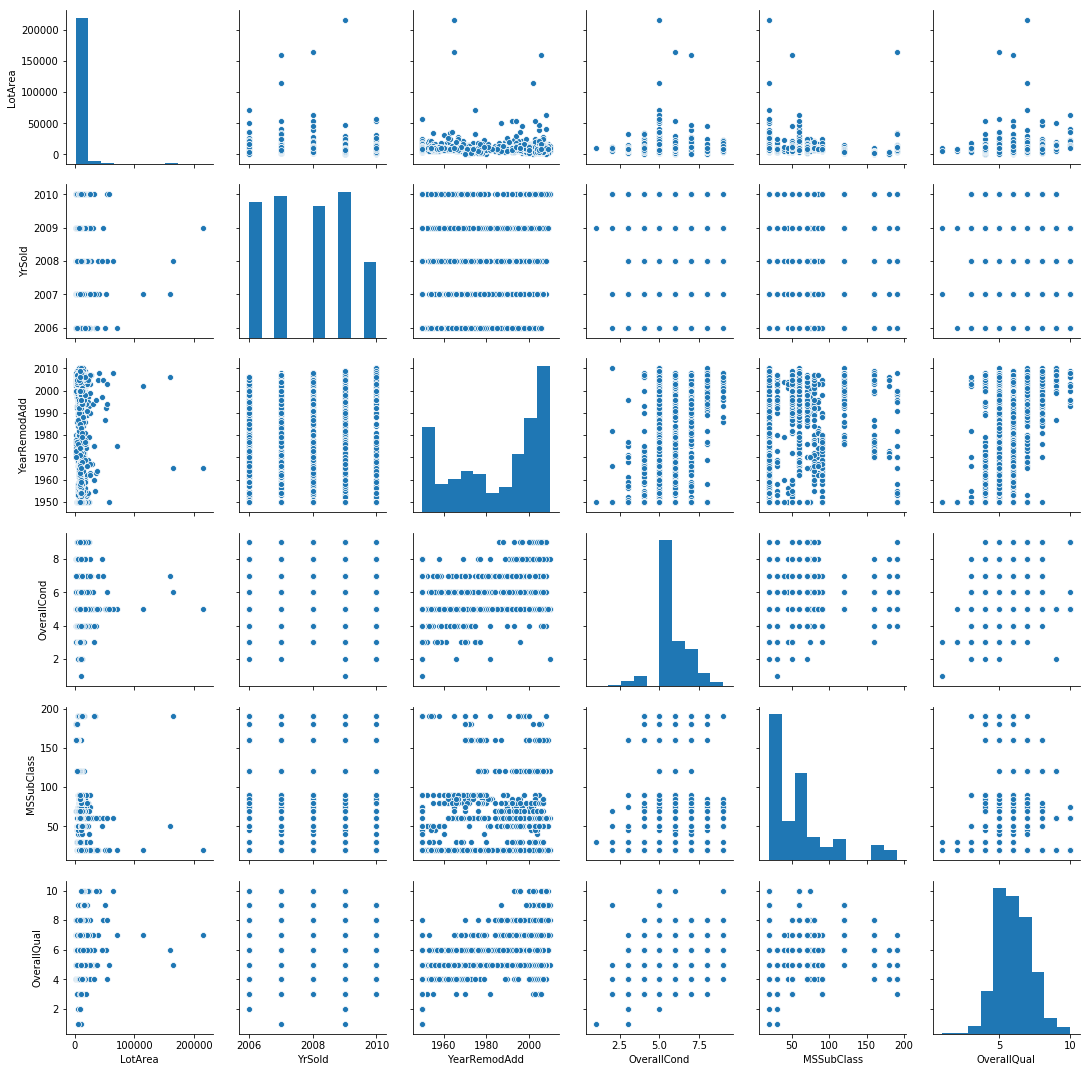

In [7]:
sns.pairplot(df[['LotArea', 'YrSold','YearRemodAdd', 'OverallCond',
                 'MSSubClass', 'OverallQual']])

/Users/casey/dev/courses/python_data_sci/course/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


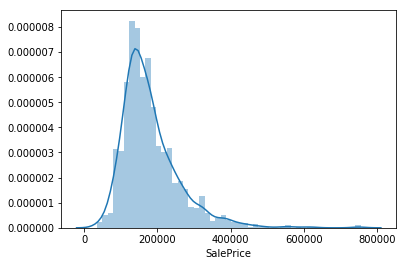

In [8]:
sns.distplot(df['SalePrice'])

In [9]:
type(df['SalePrice'])


pandas.core.series.Series

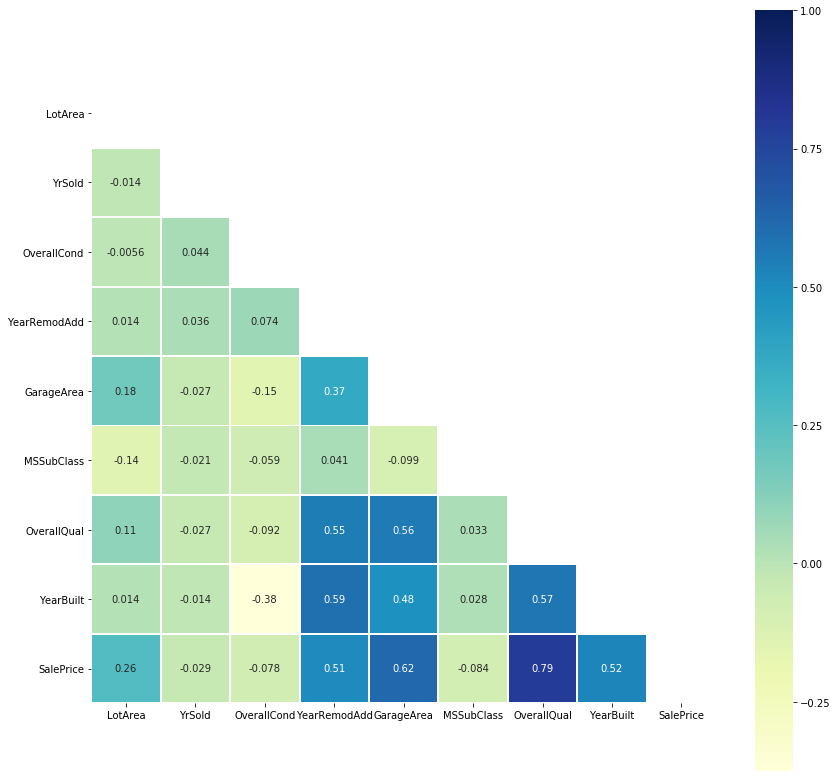

In [10]:
corr = np.corrcoef(np.random.randn(9, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df[['LotArea', 'YrSold', 'OverallCond', 'YearRemodAdd', 'GarageArea',
                'MSSubClass', 'OverallQual', 'YearBuilt', 'SalePrice']].corr(), 
            linewidths=1, annot=True, cmap="YlGnBu", mask=mask, square=True, ax=ax)

In [11]:
X = df[['LotArea', 'YrSold', 'OverallCond', 'YearRemodAdd', 'GarageArea',
        'MSSubClass', 'OverallQual', 'LowQualFinSF', 'Fireplaces', 'MoSold',
        'GarageArea', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'GrLivArea',
        '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1']]
y = df['SalePrice']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
X_train.head()

,LotArea,YrSold,OverallCond,YearRemodAdd,GarageArea,MSSubClass,OverallQual,LowQualFinSF,Fireplaces,MoSold,GarageArea,TotRmsAbvGrd,FullBath,HalfBath,GrLivArea,1stFlrSF,2ndFlrSF,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1
918,13125,2007,5,1991,833,60,7,0,1,11,833,8,2,1,2127,912,1215,1104,422,48
140,10500,2010,5,1971,0,20,4,0,1,4,0,5,1,0,864,864,0,864,432,432
638,8777,2008,7,1950,0,30,5,0,0,5,0,4,1,0,796,796,0,796,796,0
326,10846,2008,5,1993,473,120,8,0,2,5,473,6,1,1,1719,1719,0,1719,100,1619
31,8544,2008,6,2006,271,20,5,0,0,6,271,6,1,1,1228,1228,0,1228,1228,0


In [22]:
X_test.head()

,LotArea,YrSold,OverallCond,YearRemodAdd,GarageArea,MSSubClass,OverallQual,LowQualFinSF,Fireplaces,MoSold,GarageArea,TotRmsAbvGrd,FullBath,HalfBath,GrLivArea,1stFlrSF,2ndFlrSF,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1
926,11999,2007,5,2004,656,60,8,0,1,5,656,10,2,1,2374,1234,1140,1181,1181,0
1319,10215,2007,5,1954,248,20,4,0,0,2,248,5,1,0,948,948,0,864,372,492
444,8750,2008,5,1995,493,60,7,0,1,7,493,8,2,1,1908,933,975,915,273,642
471,11952,2007,6,1977,534,60,7,0,1,11,534,8,2,1,1969,1161,808,808,808,0
432,1920,2007,5,1971,440,160,5,0,0,8,440,6,1,1,1365,765,600,765,294,471


In [25]:
y_train.head()

918    238000
140    115000
638     85000
326    324000
31     149350
Name: SalePrice, dtype: int64

In [27]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
y_test.head()

926     285000
1319    111000
444     210000
471     190000
432     122500
Name: SalePrice, dtype: int64

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

/Users/casey/dev/courses/python_data_sci/course/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print(lm.intercept_)

619744.2912104572


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
LotArea,0.242716
YrSold,-808.260366
OverallCond,302.498108
YearRemodAdd,470.012991
GarageArea,22.704829
MSSubClass,-143.289097
OverallQual,22345.565275
LowQualFinSF,-26.862550
Fireplaces,10525.128735
MoSold,-293.188566


In [18]:
predictions = lm.predict(X_test)

Text(0.5,1,'Accuracy')

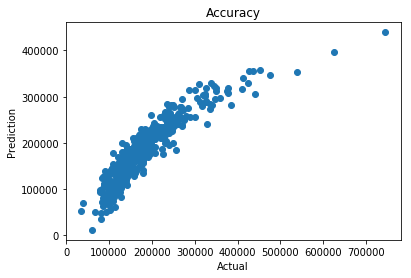

In [19]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Accuracy')

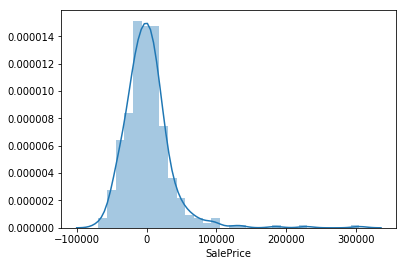

In [20]:
sns.distplot((y_test-predictions),bins=30)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 22658.11516783827
MSE: 1218250245.7162828
RMSE: 34903.4417459981
